In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
non_automated = pd.read_csv('non_automated.csv')
tumor_stats = pd.read_csv('tumor_statistics.csv')

In [4]:
non_automated.head()

File  Mean_Intensity  Std_Intensity  \
0  UPENN-GBM-00002_11_segm.nii.gz        2.189940       0.749334   
1  UPENN-GBM-00006_11_segm.nii.gz        2.060997       0.725274   
2  UPENN-GBM-00008_11_segm.nii.gz        2.179914       0.632139   
3  UPENN-GBM-00009_11_segm.nii.gz        2.254492       0.693644   
4  UPENN-GBM-00011_11_segm.nii.gz        2.199454       0.818546   

   Min_Intensity  Max_Intensity  Voxel_Count  Volume_mm3  \
0              1              4       211751      211751   
1              1              4        66872       66872   
2              1              4        29692       29692   
3              1              4       133006      133006   
4              1              4       103232      103232   

                    Bounding_Box  Surface_Area  Compactness  Contrast  \
0    (51, 77, 29, 144, 187, 111)        211618   459.730628  0.024349   
1     (55, 125, 73, 56, 126, 74)             1     0.000015  0.015174   
2  (125, 119, 63, 169, 175, 109)         22325   112.343448  0.009475   
3     (61, 86, 23, 111, 134, 79)         20156    21.514700  0.012385   
4  (126, 123, 54, 181, 202, 122)        103231   321.292701  0.019687   

   Dissimilarity  Homogeneity    Energy  Correlation       entropy  
0       0.010813     0.995940  0.954224     0.925642  1.097414e+00  
1       0.006693     0.997489  0.977410     0.879215 -1.280000e-15  
2       0.003975     0.998542  0.989298     0.859743 -1.280000e-15  
3       0.005965     0.997657  0.978940     0.902429  1.898041e-02  
4       0.008016     0.997134  0.972590     0.897136 -1.280000e-15

In [5]:
non_automated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   File            147 non-null    object 
 1   Mean_Intensity  147 non-null    float64
 2   Std_Intensity   147 non-null    float64
 3   Min_Intensity   147 non-null    int64  
 4   Max_Intensity   147 non-null    int64  
 5   Voxel_Count     147 non-null    int64  
 6   Volume_mm3      147 non-null    int64  
 7   Bounding_Box    147 non-null    object 
 8   Surface_Area    147 non-null    int64  
 9   Compactness     147 non-null    float64
 10  Contrast        147 non-null    float64
 11  Dissimilarity   147 non-null    float64
 12  Homogeneity     147 non-null    float64
 13  Energy          147 non-null    float64
 14  Correlation     147 non-null    float64
 15  entropy         147 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 18.5+ KB


In [6]:
non_automated.describe()

Mean_Intensity  Std_Intensity  Min_Intensity  Max_Intensity  \
count      147.000000     147.000000     147.000000          147.0   
mean         2.279078       0.880835       1.006803            4.0   
std          0.227444       0.249435       0.082479            0.0   
min          1.745095       0.205609       1.000000            4.0   
25%          2.111127       0.708525       1.000000            4.0   
50%          2.254492       0.916147       1.000000            4.0   
75%          2.378328       1.063712       1.000000            4.0   
max          3.051870       1.413401       2.000000            4.0   

         Voxel_Count     Volume_mm3   Surface_Area  Compactness    Contrast  \
count     147.000000     147.000000     147.000000   147.000000  147.000000   
mean    79201.680272   79201.680272   65790.278912   212.643408    0.017651   
std     49146.180690   49146.180690   56151.106844   139.356182    0.007562   
min      7280.000000    7280.000000       1.000000     0.000007    0.004695   
25%     38614.000000   38614.000000   18370.500000   109.301333    0.012139   
50%     71508.000000   71508.000000   54338.000000   228.779490    0.016375   
75%    106204.500000  106204.500000   99559.500000   314.401199    0.022760   
max    211751.000000  211751.000000  211618.000000   459.730628    0.041342   

       Dissimilarity  Homogeneity      Energy  Correlation       entropy  
count     147.000000   147.000000  147.000000   147.000000  1.470000e+02  
mean        0.007105     0.997471    0.979053     0.873918  3.315138e-01  
std         0.002704     0.000917    0.010106     0.043157  5.867071e-01  
min         0.001915     0.994917    0.953054     0.668867 -1.280000e-15  
25%         0.005172     0.996833    0.973640     0.849372 -1.280000e-15  
50%         0.006705     0.997594    0.980397     0.884828  3.601594e-03  
75%         0.009182     0.998108    0.987028     0.905107  4.110516e-01  
max         0.015276     0.999309    0.995566     0.936441  2.923147e+00

In [21]:
non_automated.isnull().sum()

File              0
Mean_Intensity    0
Std_Intensity     0
Min_Intensity     0
Max_Intensity     0
Voxel_Count       0
Volume_mm3        0
Bounding_Box      0
Surface_Area      0
Compactness       0
Contrast          0
Dissimilarity     0
Homogeneity       0
Energy            0
Correlation       0
entropy           0
dtype: int64

In [7]:
tumor_stats.head()

File  Mean_Intensity  \
0  UPENN-GBM-00001_11_automated_approx_segm.nii.gz        2.097237   
1  UPENN-GBM-00002_11_automated_approx_segm.nii.gz        2.219465   
2  UPENN-GBM-00003_11_automated_approx_segm.nii.gz        2.006608   
3  UPENN-GBM-00004_11_automated_approx_segm.nii.gz        1.842772   
4  UPENN-GBM-00005_11_automated_approx_segm.nii.gz        2.333461   

   Std_Intensity  Min_Intensity  Max_Intensity  Voxel_Count  Volume_mm3  \
0       0.473978              1              4        23160       23160   
1       0.790134              1              4       200670      200670   
2       0.758281              1              4        67650       67650   
3       0.807200              1              4        56097       56097   
4       0.841791              1              4        89027       89027   

                   Bounding_Box  Surface_Area  Compactness  Contrast  \
0    (68, 83, 28, 109, 131, 71)         23160   152.184099  0.005666   
1   (51, 77, 30, 133, 185, 111)        200658   447.921871  0.020863   
2   (86, 96, 79, 130, 186, 131)         67650   260.096136  0.013209   
3   (91, 71, 55, 135, 158, 115)         55812   235.045392  0.012166   
4  (78, 140, 62, 121, 207, 137)         83778   272.378763  0.013392   

   Dissimilarity  Homogeneity    Energy  Correlation       entropy  
0       0.002741     0.998921  0.990100     0.879382 -1.280000e-15  
1       0.009111     0.996614  0.956347     0.938852  1.000675e+00  
2       0.005661     0.997919  0.976781     0.907814  1.502537e+00  
3       0.005503     0.997909  0.982829     0.898125  1.272166e+00  
4       0.005843     0.997826  0.978816     0.910465  2.337788e-01

In [8]:
tumor_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   File            611 non-null    object 
 1   Mean_Intensity  611 non-null    float64
 2   Std_Intensity   611 non-null    float64
 3   Min_Intensity   611 non-null    int64  
 4   Max_Intensity   611 non-null    int64  
 5   Voxel_Count     611 non-null    int64  
 6   Volume_mm3      611 non-null    int64  
 7   Bounding_Box    611 non-null    object 
 8   Surface_Area    611 non-null    int64  
 9   Compactness     611 non-null    float64
 10  Contrast        611 non-null    float64
 11  Dissimilarity   611 non-null    float64
 12  Homogeneity     611 non-null    float64
 13  Energy          611 non-null    float64
 14  Correlation     611 non-null    float64
 15  entropy         611 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 76.5+ KB


In [9]:
tumor_stats.describe()

Mean_Intensity  Std_Intensity  Min_Intensity  Max_Intensity  \
count      611.000000     611.000000     611.000000     611.000000   
mean         2.341926       0.902571       1.004910       3.977087   
std          0.275297       0.241516       0.069956       0.213016   
min          1.314814       0.000000       1.000000       2.000000   
25%          2.168180       0.765411       1.000000       4.000000   
50%          2.293739       0.934184       1.000000       4.000000   
75%          2.466572       1.079305       1.000000       4.000000   
max          3.341581       1.422336       2.000000       4.000000   

         Voxel_Count     Volume_mm3   Surface_Area  Compactness    Contrast  \
count     611.000000     611.000000     611.000000   611.000000  611.000000   
mean    83659.454992   83659.454992   78002.919804   250.319257    0.015912   
std     51043.105992   51043.105992   54672.106764   118.093163    0.006755   
min      3647.000000    3647.000000       1.000000     0.000013    0.002736   
25%     41773.000000   41773.000000   33727.500000   175.653389    0.010908   
50%     76858.000000   76858.000000   71434.000000   263.480550    0.015051   
75%    119944.000000  119944.000000  116109.000000   340.333449    0.020176   
max    235963.000000  235963.000000  235963.000000   485.760229    0.038289   

       Dissimilarity  Homogeneity      Energy  Correlation       entropy  
count     611.000000   611.000000  611.000000   611.000000  6.110000e+02  
mean        0.006550     0.997641    0.977769     0.907069  3.414558e-01  
std         0.002479     0.000842    0.010226     0.024587  5.386641e-01  
min         0.001318     0.994999    0.950330     0.807532 -1.280000e-15  
25%         0.004761     0.997028    0.970555     0.892969 -1.280000e-15  
50%         0.006255     0.997733    0.978645     0.911314 -1.280000e-15  
75%         0.008234     0.998227    0.985946     0.925778  5.487570e-01  
max         0.014309     0.999501    0.998000     0.954096  2.817139e+00

In [22]:
tumor_stats.isnull().sum()

File              0
Mean_Intensity    0
Std_Intensity     0
Min_Intensity     0
Max_Intensity     0
Voxel_Count       0
Volume_mm3        0
Bounding_Box      0
Surface_Area      0
Compactness       0
Contrast          0
Dissimilarity     0
Homogeneity       0
Energy            0
Correlation       0
entropy           0
dtype: int64

<Figure size 1500x800 with 0 Axes>

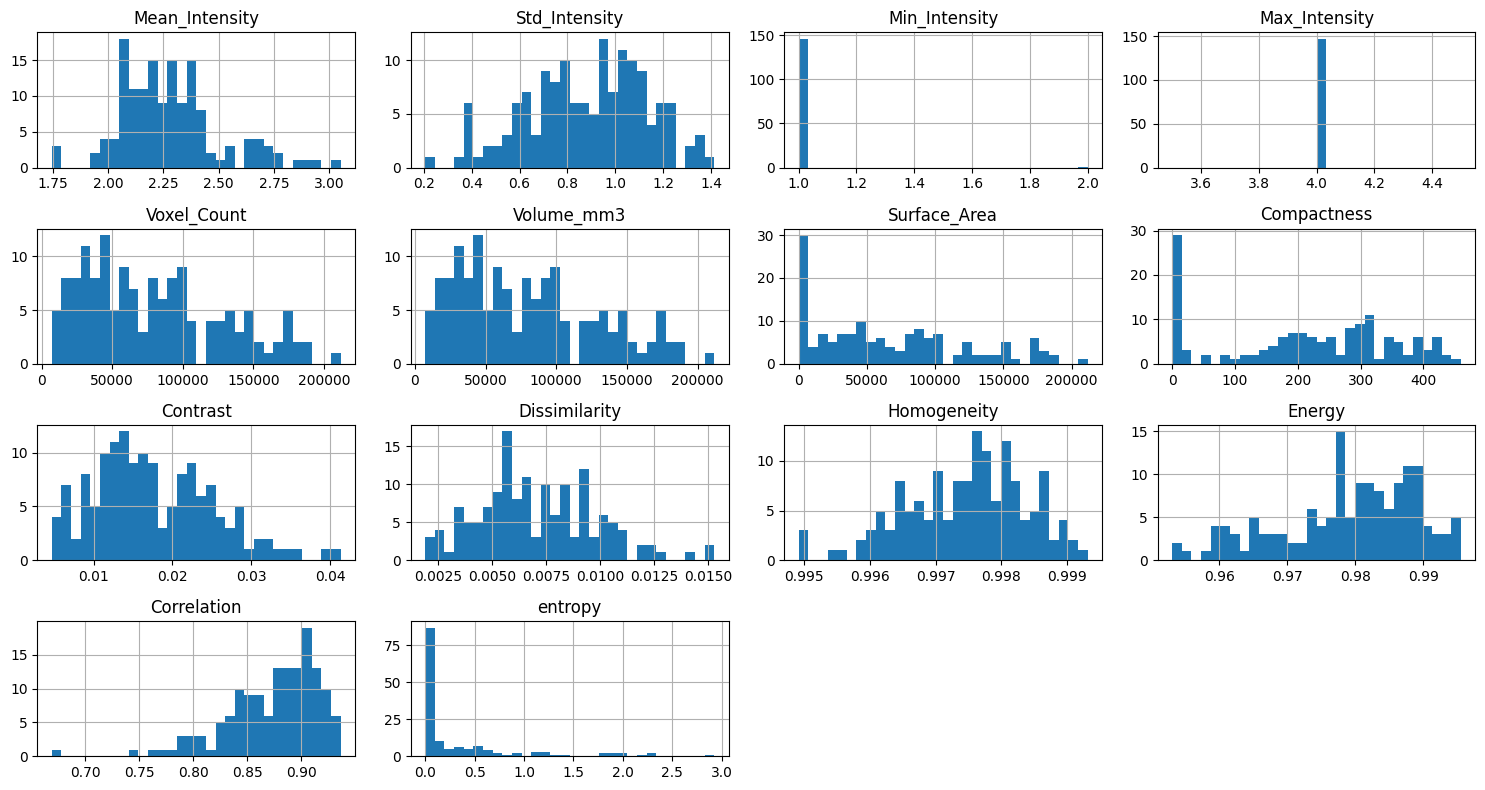

In [12]:
numeric_cols = non_automated.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
non_automated[numeric_cols].hist(bins=30, figsize=(15, 8), layout=(4, 4))
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

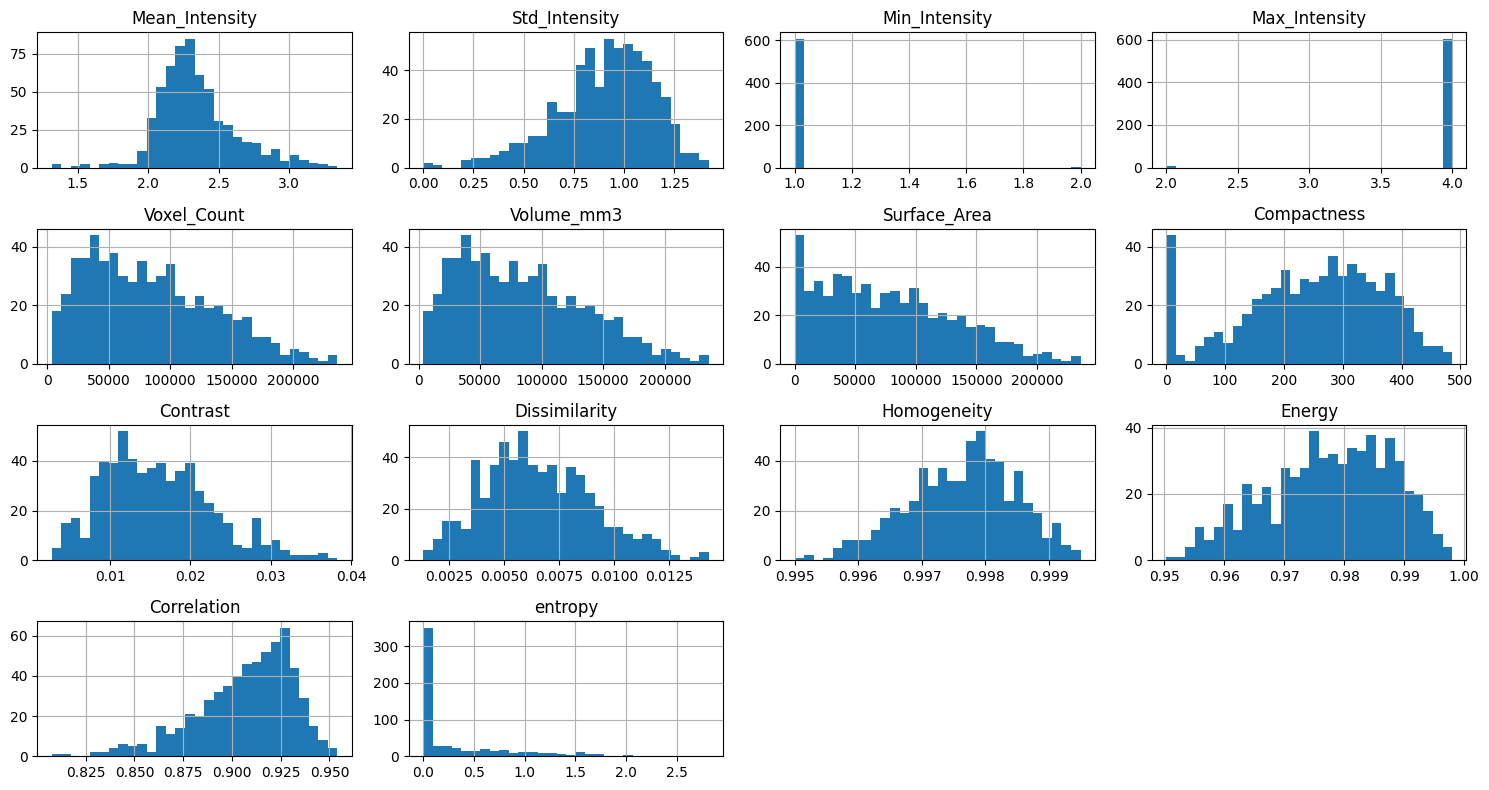

In [13]:
numeric_cols = tumor_stats.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
tumor_stats[numeric_cols].hist(bins=30, figsize=(15, 8), layout=(4, 4))
plt.tight_layout()
plt.show()

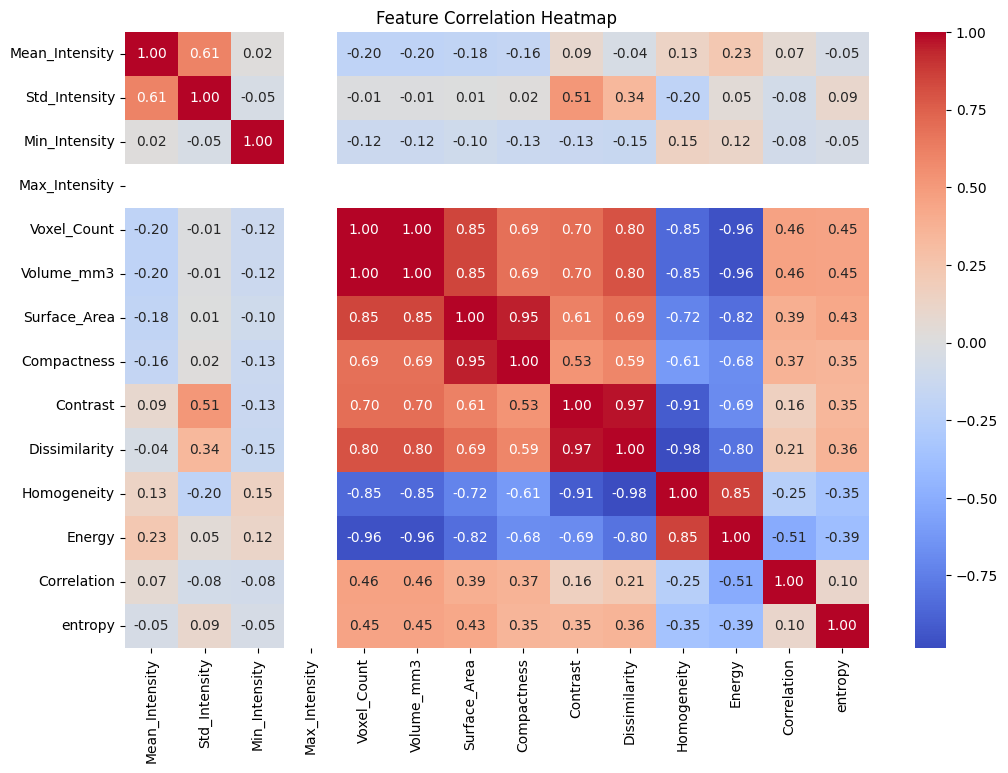

In [15]:
# Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(non_automated[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

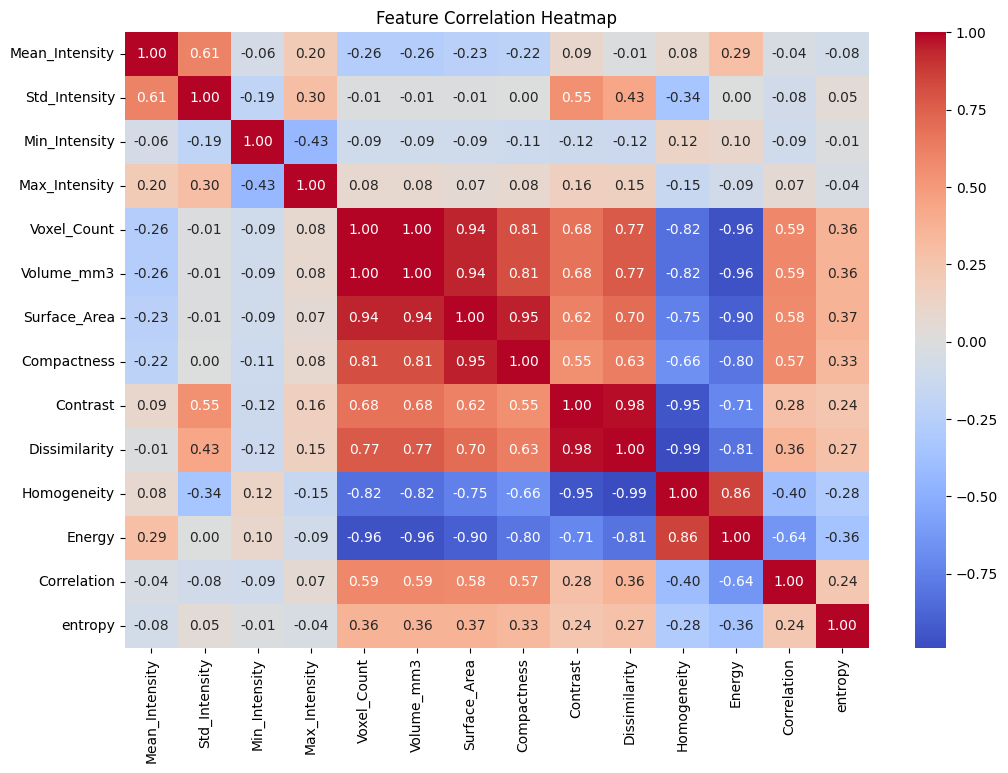

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(tumor_stats[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<Figure size 1500x800 with 0 Axes>

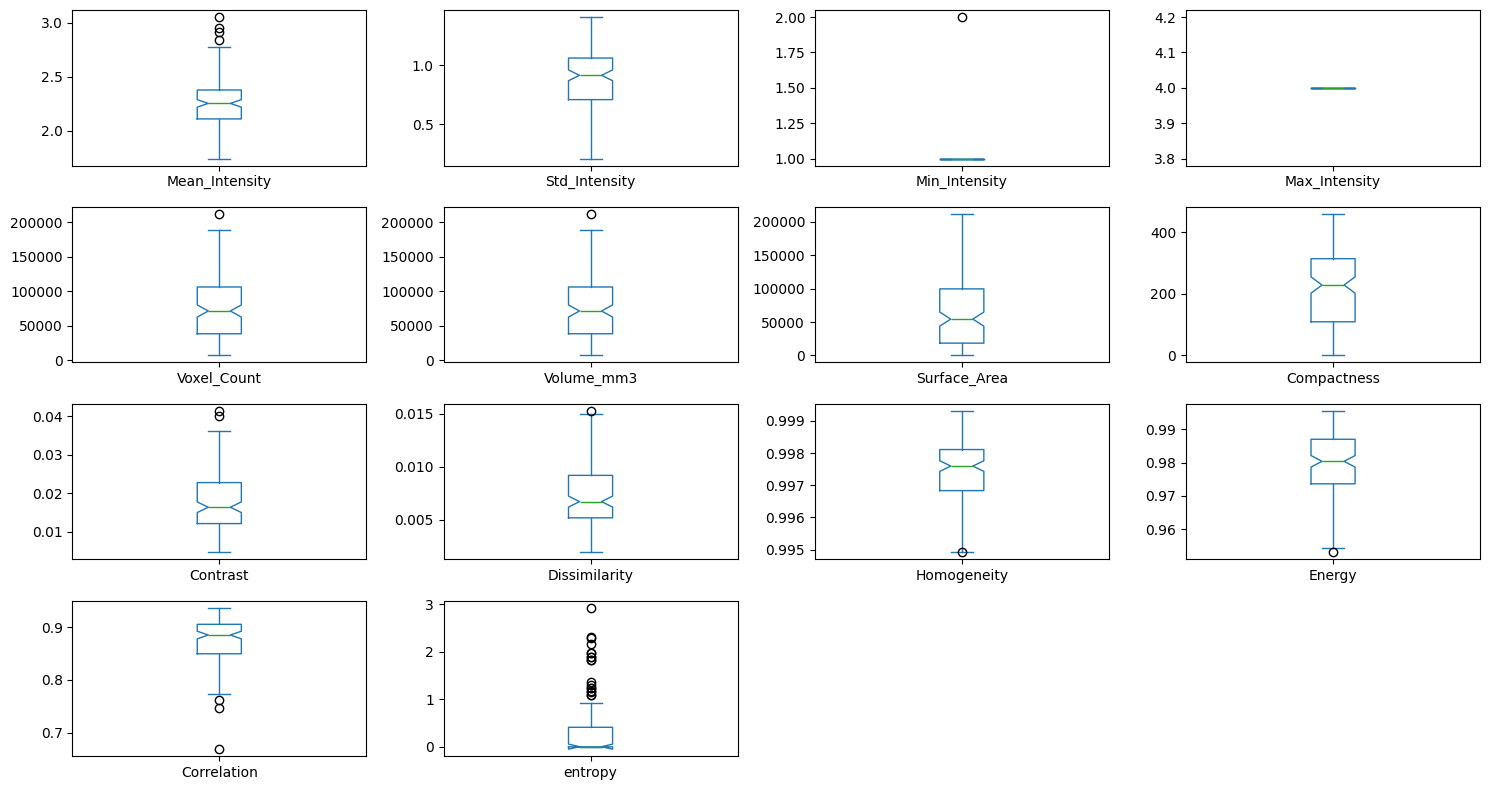

In [17]:
# Box plots for outlier detection

plt.figure(figsize=(15, 8))
non_automated[numeric_cols].plot(kind="box", subplots=True, layout=(4, 4), figsize=(15, 8), notch=True)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

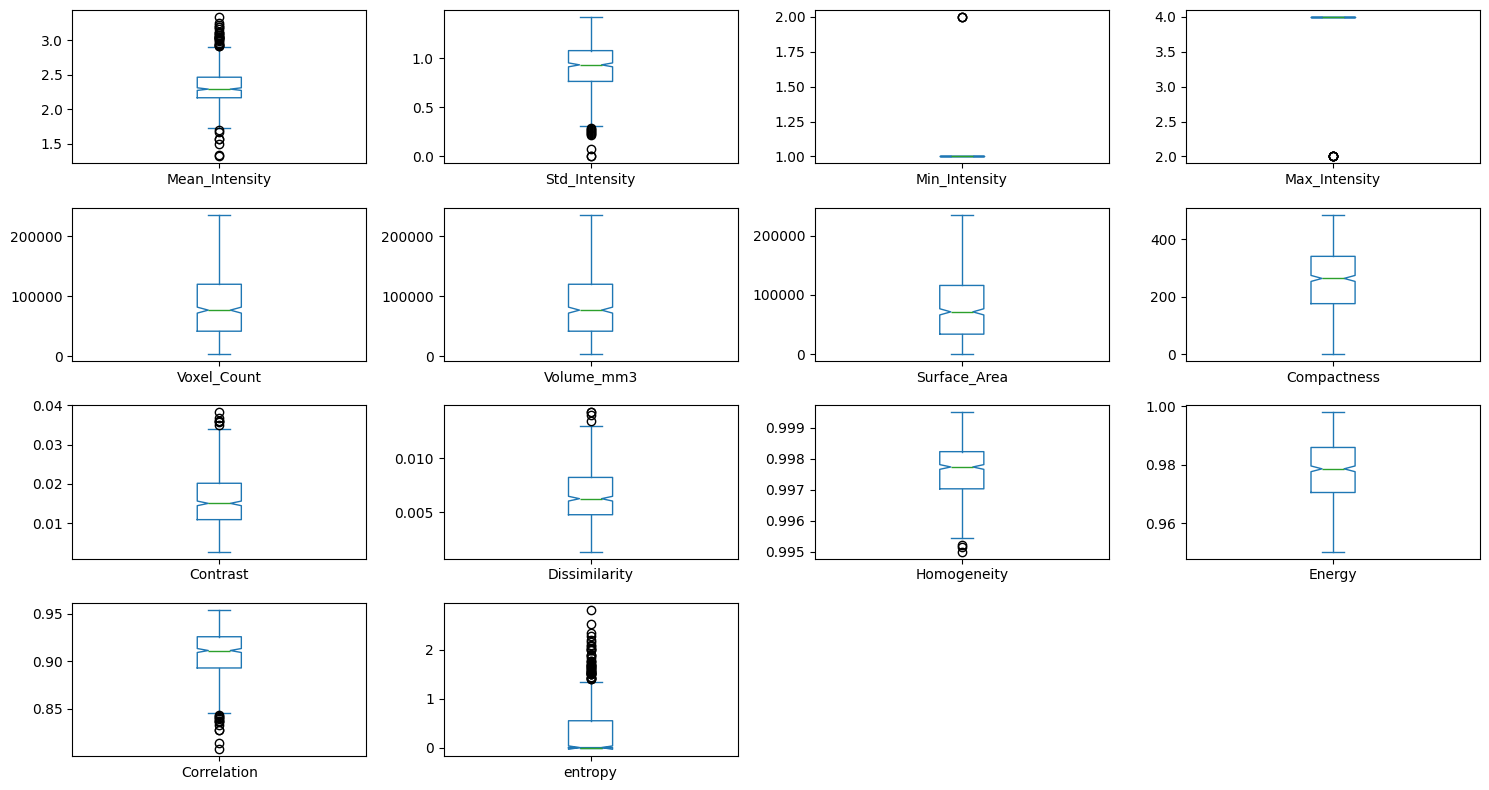

In [18]:
# Box plots for outlier detection

plt.figure(figsize=(15, 8))
tumor_stats[numeric_cols].plot(kind="box", subplots=True, layout=(4, 4), figsize=(15, 8), notch=True)
plt.tight_layout()
plt.show()

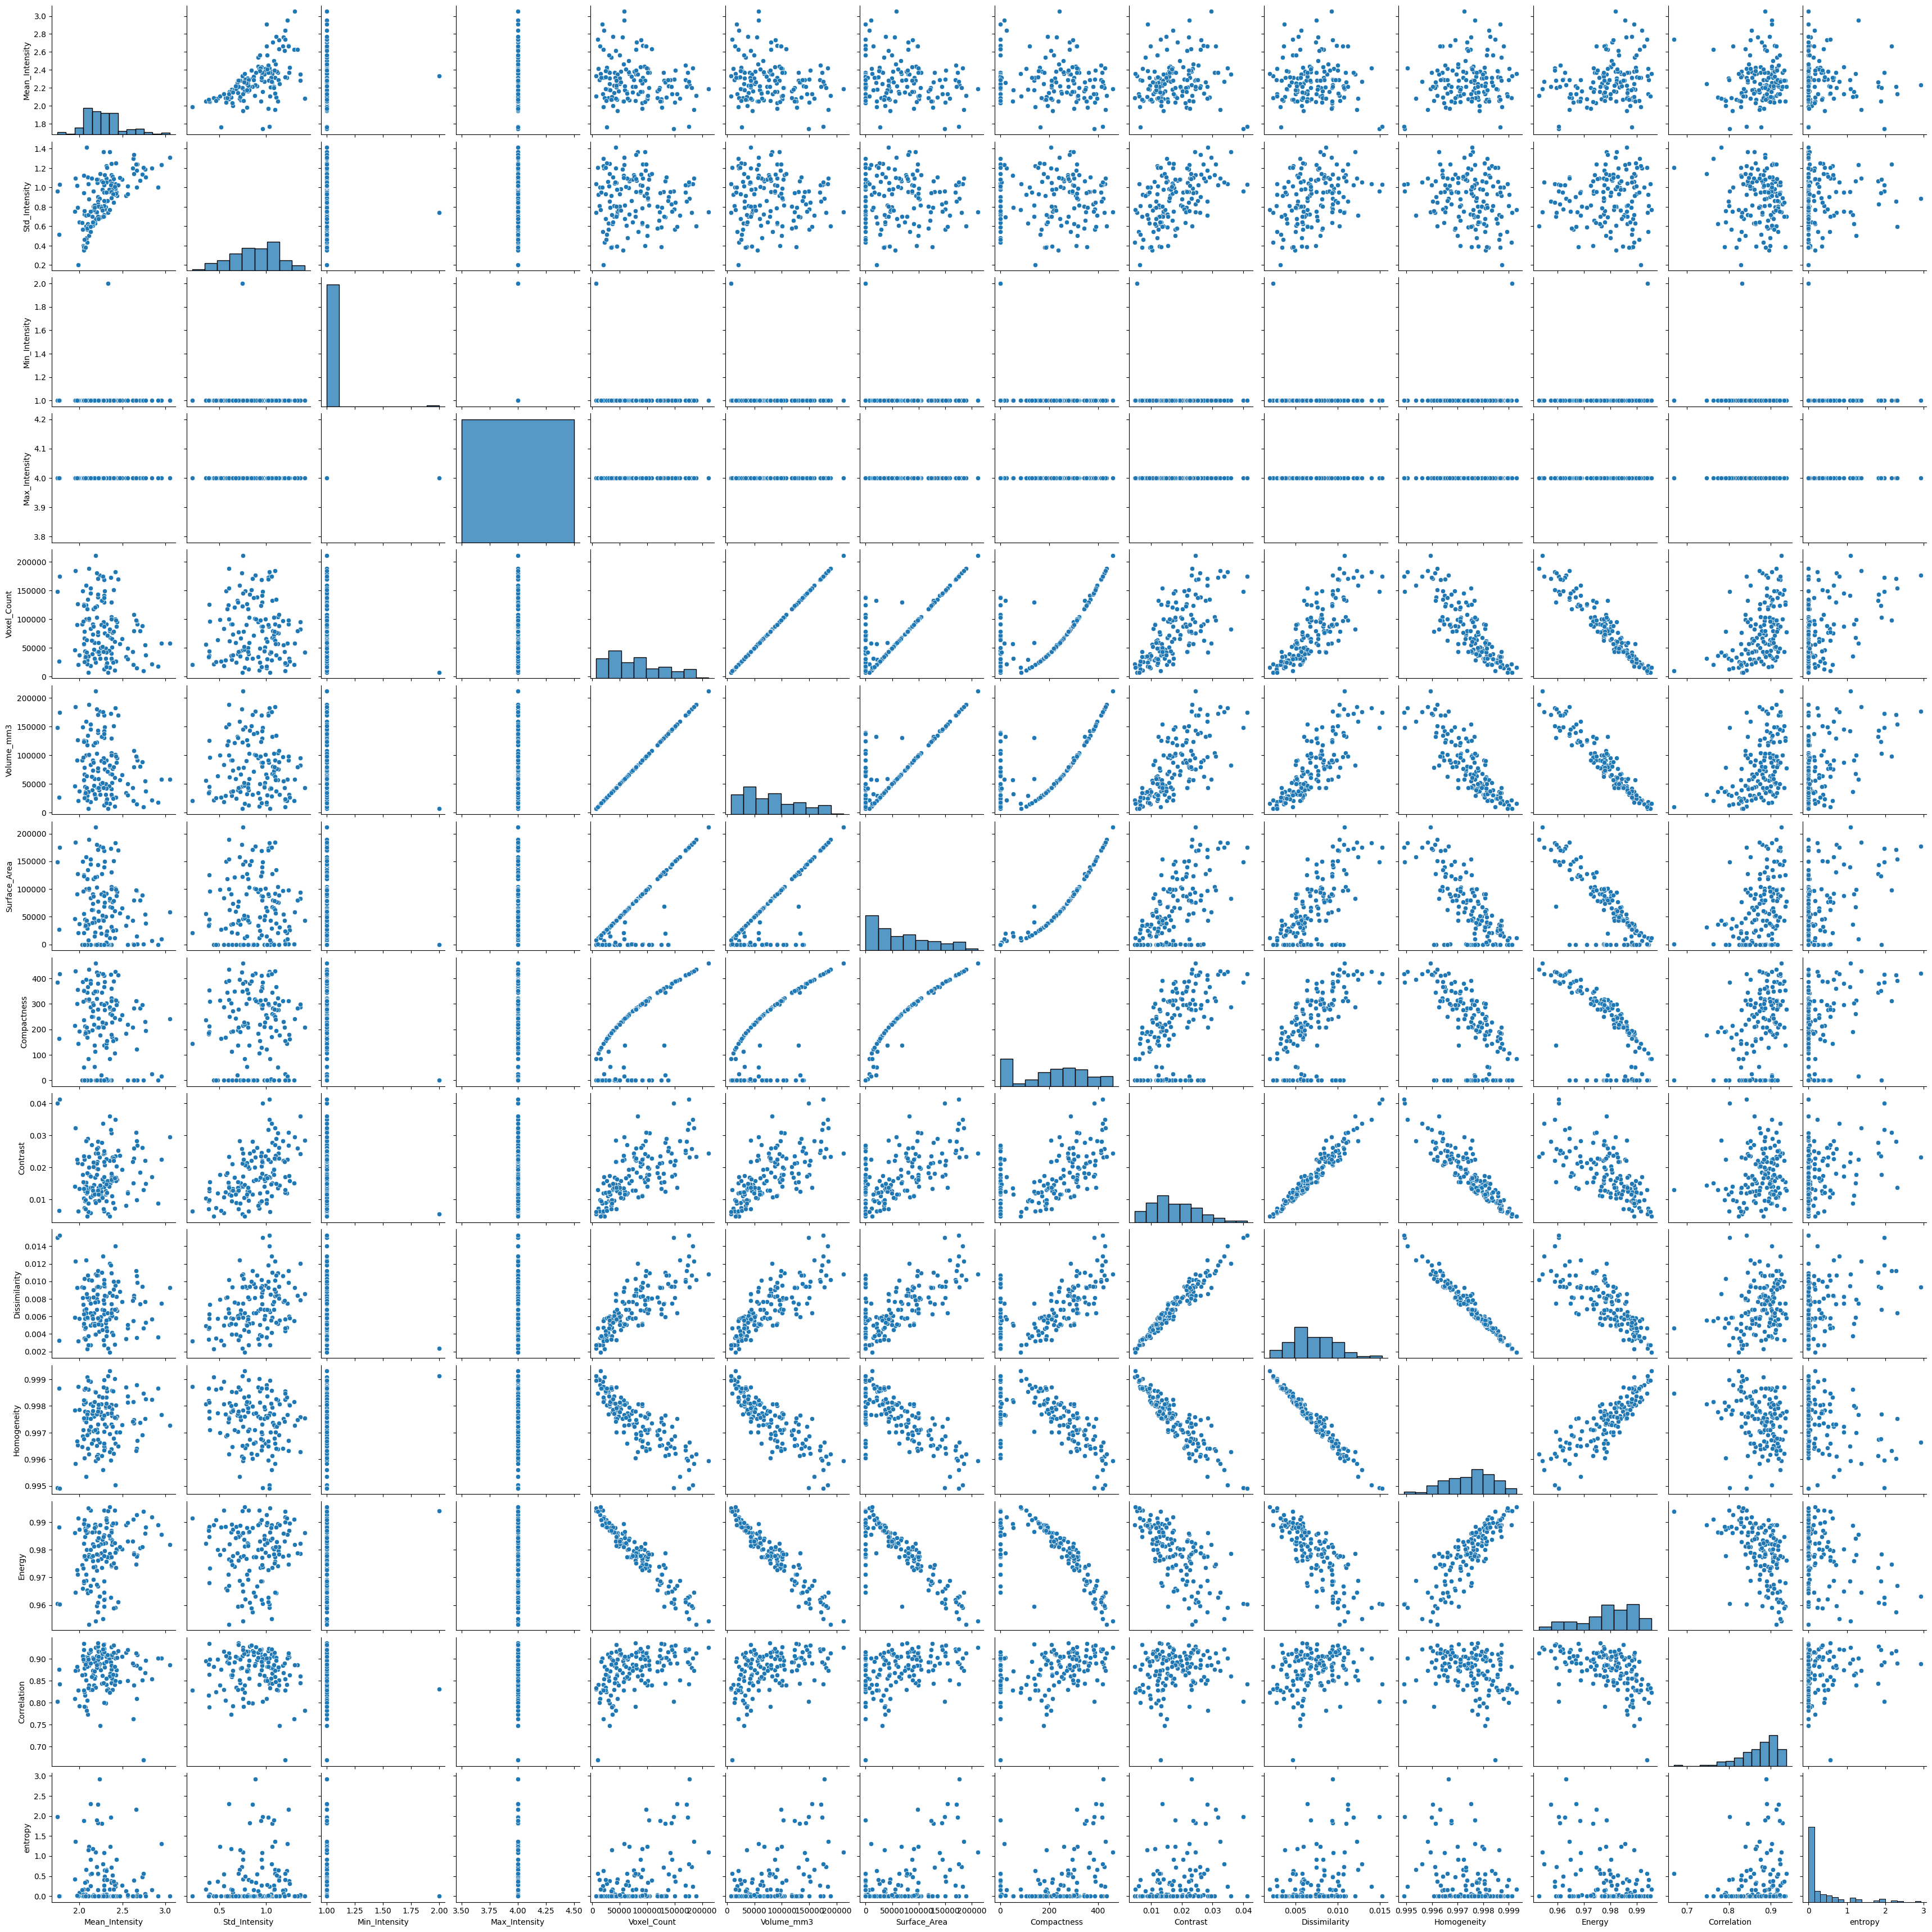

In [19]:
# Pairplot to see relationships
sns.pairplot(non_automated[numeric_cols])
plt.show()

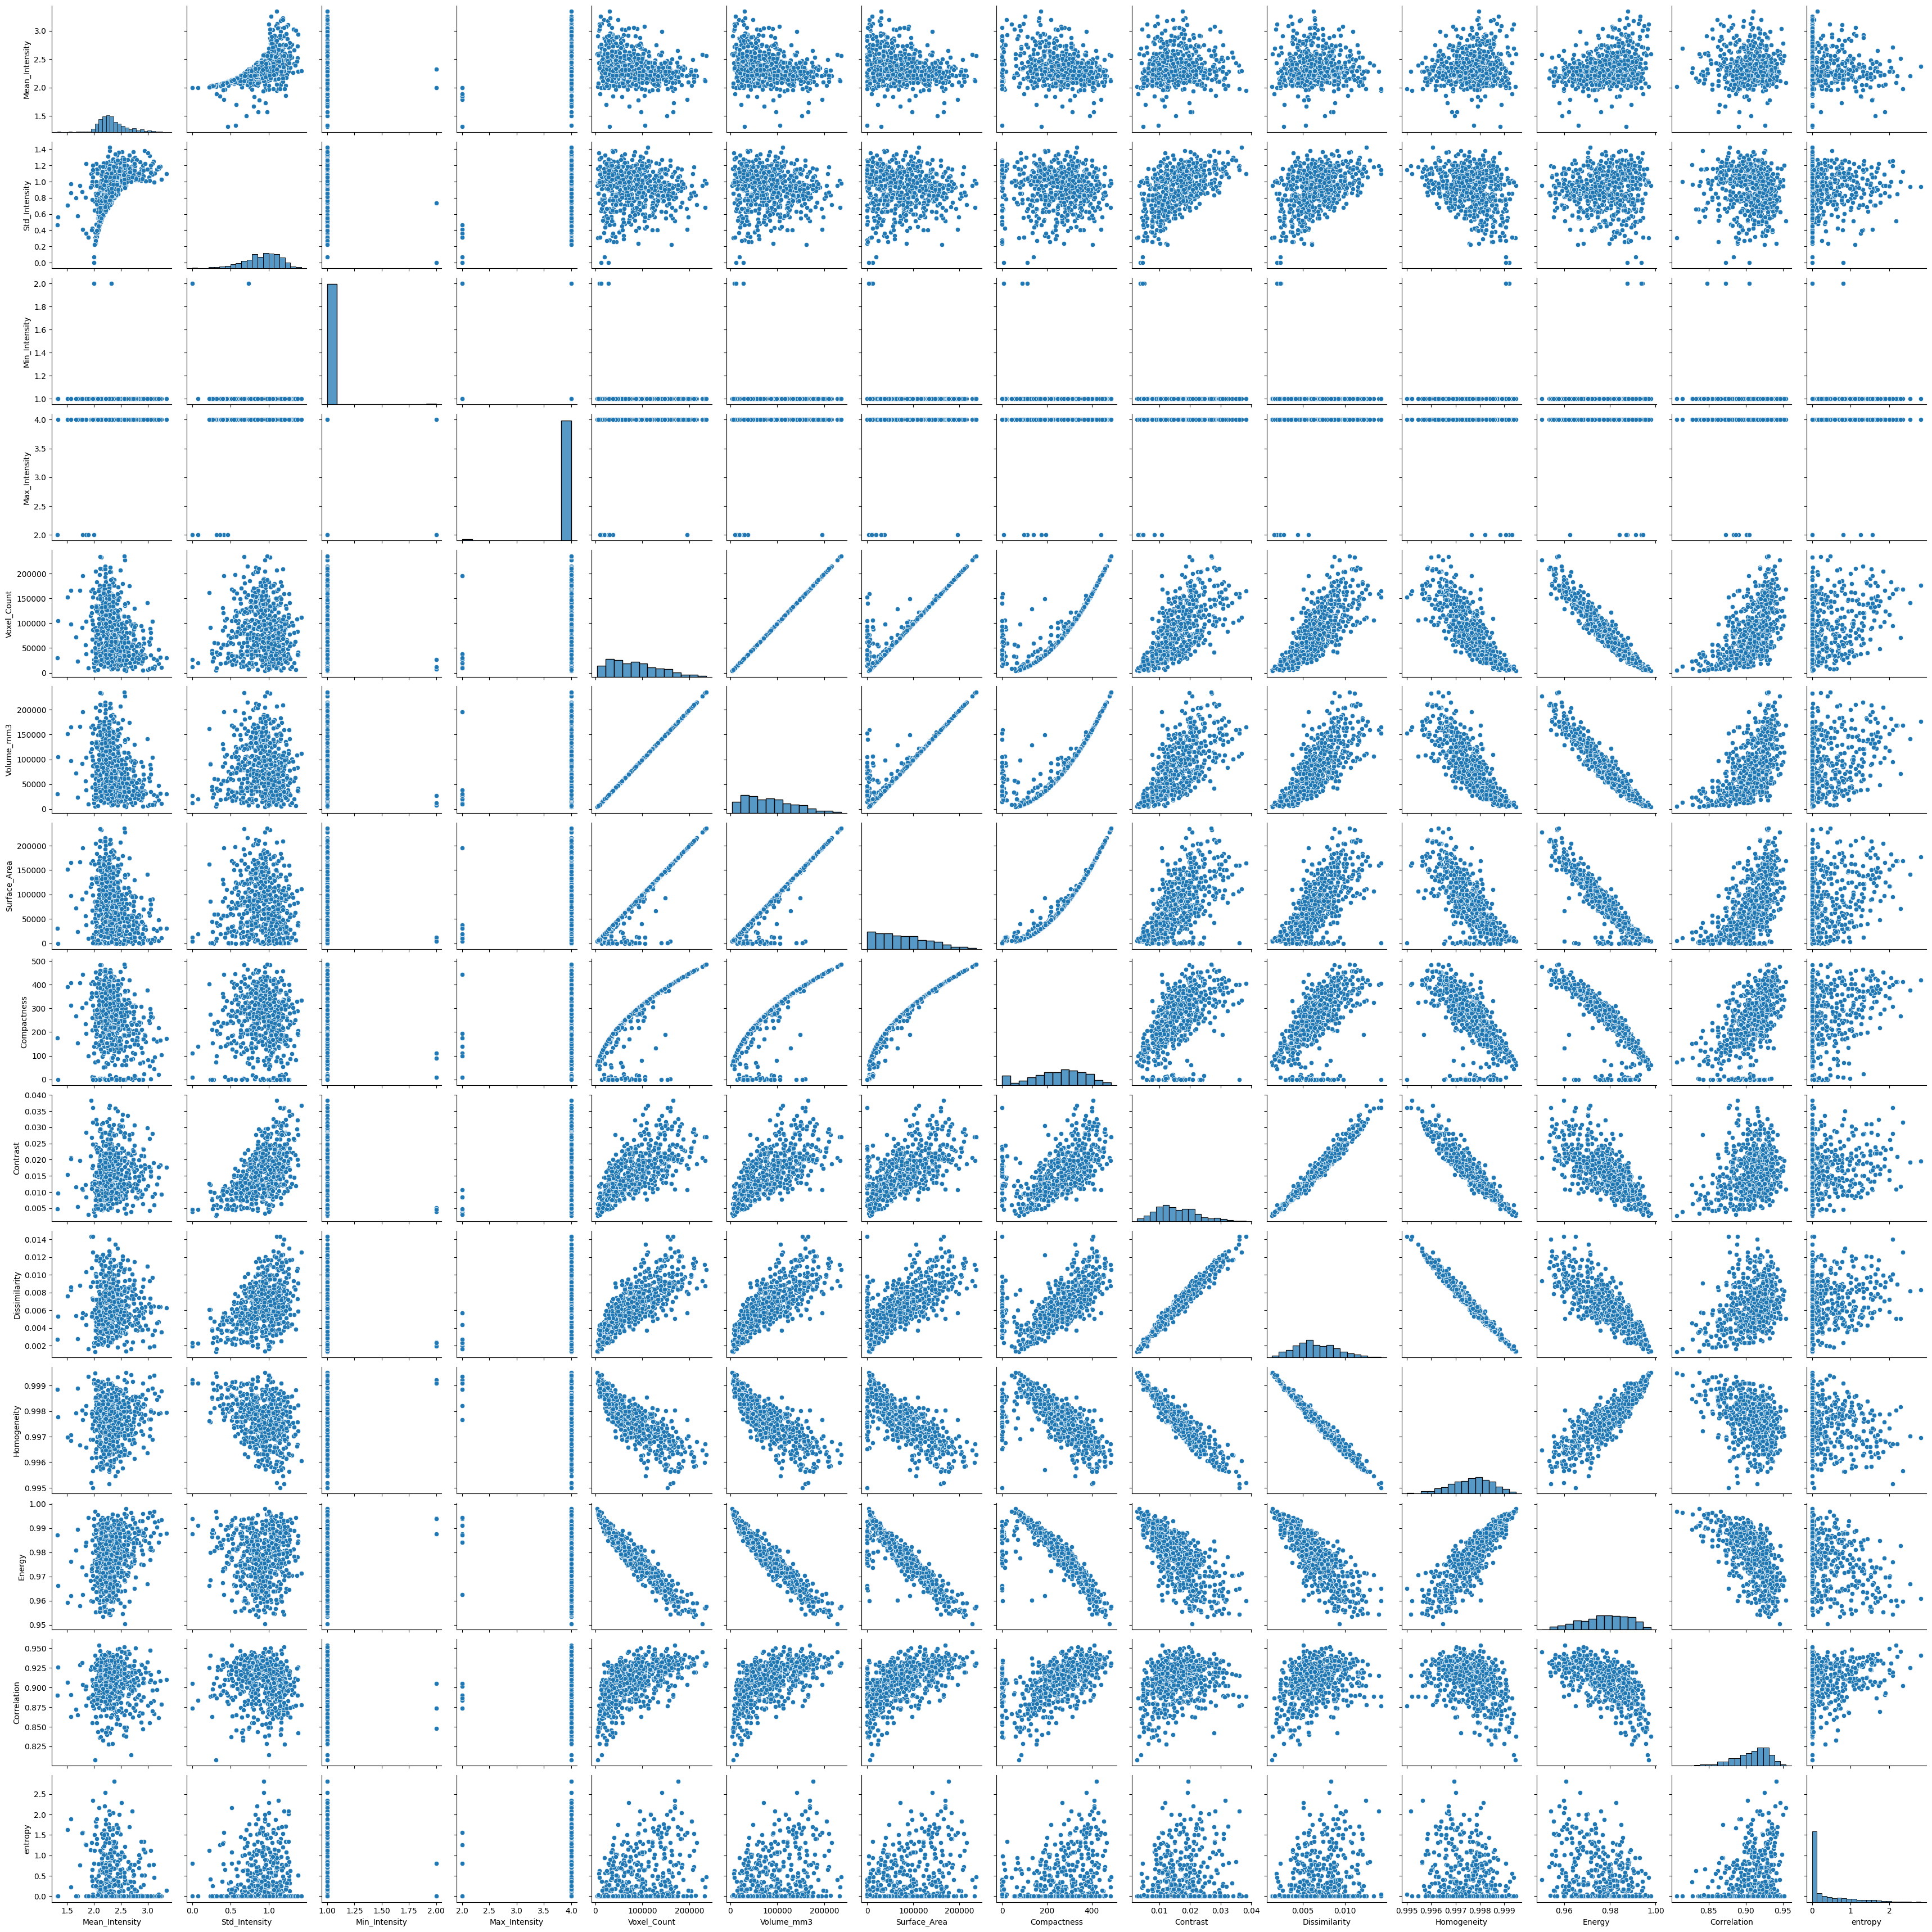

In [20]:
# Pairplot to see relationships
sns.pairplot(tumor_stats[numeric_cols])
plt.show()

---

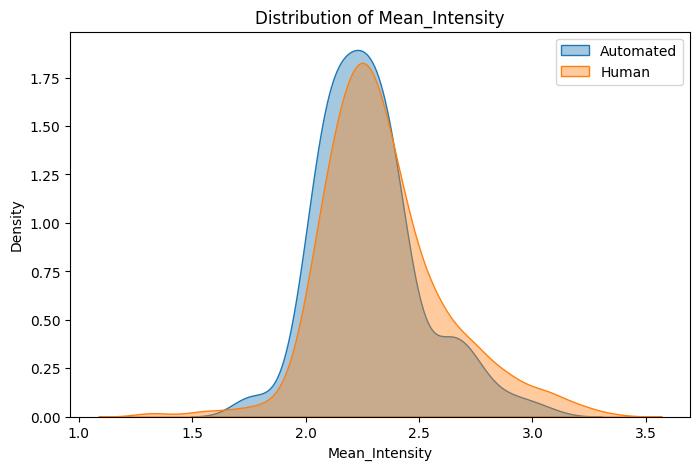

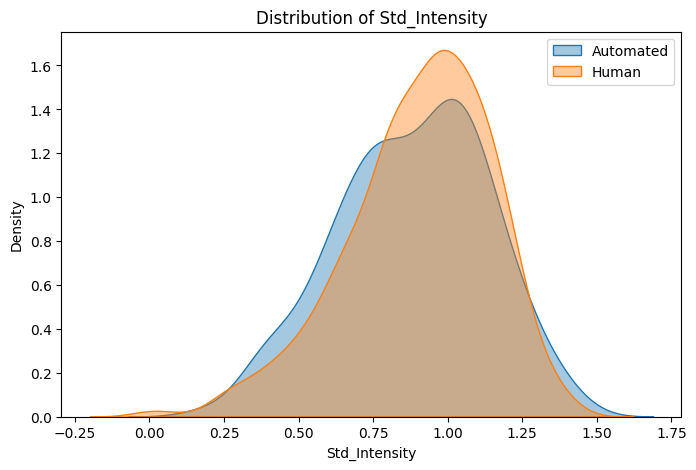

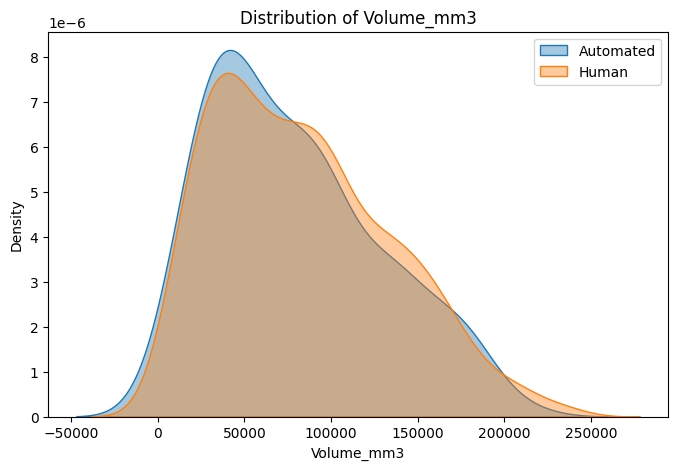

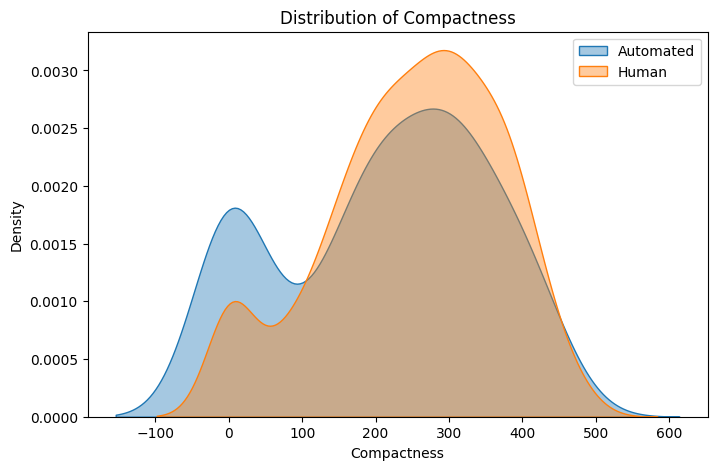

In [24]:
features = ['Mean_Intensity', 'Std_Intensity', 'Volume_mm3', 'Compactness']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(non_automated[feature], label="Automated", fill=True, alpha=0.4)
    sns.kdeplot(tumor_stats[feature], label="Human", fill=True, alpha=0.4)
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()


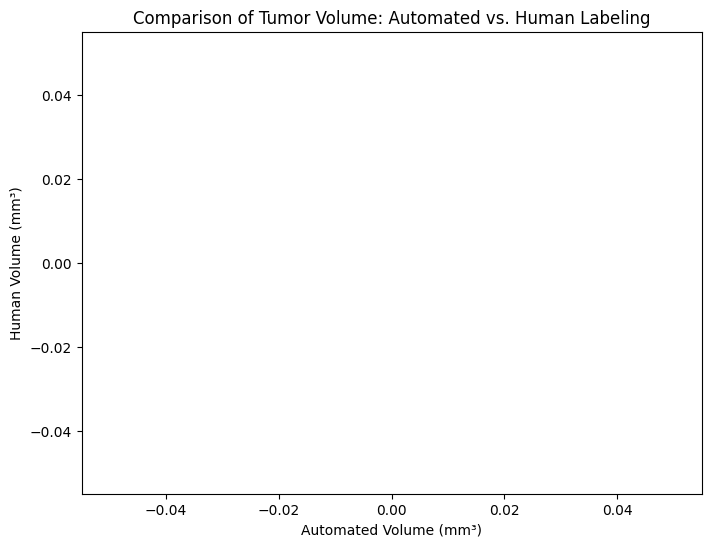

In [29]:
merged_df = pd.merge(non_automated, tumor_stats, on="File", suffixes=("_auto", "_human"))

# Scatter plot comparing "Volume_mm3"
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Volume_mm3_auto'], merged_df['Volume_mm3_human'], alpha=0.5)
plt.xlabel('Automated Volume (mm³)')
plt.ylabel('Human Volume (mm³)')
plt.title('Comparison of Tumor Volume: Automated vs. Human Labeling')
plt.show()

In [30]:
merged_df = pd.merge(non_automated, tumor_stats, on="File", suffixes=("_auto", "_human"))
print("Merged DataFrame Shape:", merged_df.shape)
print(merged_df.head())  # Check if

Merged DataFrame Shape: (0, 31)
Empty DataFrame
Columns: [File, Mean_Intensity_auto, Std_Intensity_auto, Min_Intensity_auto, Max_Intensity_auto, Voxel_Count_auto, Volume_mm3_auto, Bounding_Box_auto, Surface_Area_auto, Compactness_auto, Contrast_auto, Dissimilarity_auto, Homogeneity_auto, Energy_auto, Correlation_auto, entropy_auto, Mean_Intensity_human, Std_Intensity_human, Min_Intensity_human, Max_Intensity_human, Voxel_Count_human, Volume_mm3_human, Bounding_Box_human, Surface_Area_human, Compactness_human, Contrast_human, Dissimilarity_human, Homogeneity_human, Energy_human, Correlation_human, entropy_human]
Index: []

[0 rows x 31 columns]


In [31]:
print(set(non_automated["File"]).intersection(set(tumor_stats["File"])))  # Common files

set()


In [32]:
if not merged_df.empty:
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_df['Volume_mm3_auto'], merged_df['Volume_mm3_human'], alpha=0.5)
    plt.xlabel('Automated Volume (mm³)')
    plt.ylabel('Human Volume (mm³)')
    plt.title('Comparison of Tumor Volume: Automated vs. Human Labeling')
    plt.show()
else:
    print("No common files found. Check dataset alignment.")

No common files found. Check dataset alignment.
